In [21]:
import pandas as pd
import matplotlib as plt
import urllib
%matplotlib inline
plt.style.use('ggplot')

In [22]:
# Load 311 complaints
three11 = pd.read_csv('C:/Data/AnalyzeBoston/data/311.csv', dtype=object)

In [23]:
# Convert date/time columns to datetime
three11['open_dt'] = pd.to_datetime(three11['open_dt'], errors='coerce')
three11['target_dt'] = pd.to_datetime(three11['open_dt'], errors='coerce')
three11['closed_dt'] = pd.to_datetime(three11['open_dt'], errors='coerce')

#### Create subset of complaints related to garbage

In [24]:
garbagetypes = ['Overflowing or Un-kept Dumpster',
                'Improper Storage of Trash (Barrels)',
                'Missed Trash/Recycling/Yard Waste/Bulk Item',
                'Trash on Vacant Lot',
                'Illegal Dumping']

In [25]:
garbage = three11[three11.TYPE.isin(garbagetypes)]

In [26]:
garbage.to_csv('C:/Data/AnalyzeBoston/data/311_garbage.csv', index=False)

#### Create subset of garbage-related complaints from move-in week (Aug. 29-Sept. 4)

In [27]:
garbage2016 = garbage[garbage['open_dt'].dt.year == 2016]

In [28]:
moveinweek = garbage2016[(garbage2016['open_dt'] >= pd.datetime(2016, 8, 29)) &
                (garbage2016['open_dt'] < pd.datetime(2016, 9, 5))]

In [29]:
moveinweek.to_csv('C:/Data/AnalyzeBoston/data/311_garbage_moveinweek_2016.csv', index=False)

#### Plot garbage complaints by week for the year 2016

In [30]:
garbage2016 = garbage2016.set_index('open_dt')

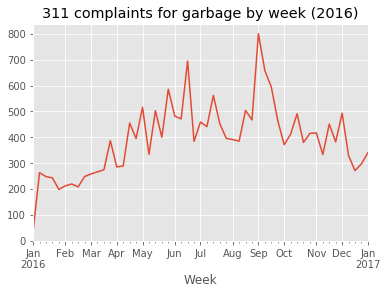

In [31]:
ax = garbage2016.resample('W').size().plot(title="311 complaints for garbage by week (2016)")
ax.set_xlabel('Week')

#### Download photos of garbage submitted with 311 complaints during moving week

In [36]:
moveinweek = pd.read_csv('C:/Data/AnalyzeBoston/data/311_garbage_moveinweek_2016.csv')

In [37]:
picture = urllib.URLopener()

In [38]:
picturelist = []

In [39]:
for index, row in moveinweek.iterrows():
    url = str(row['SubmittedPhoto'])
    filename = str(row['CASE_ENQUIRY_ID'])
    picturelist.append([url, filename])

In [43]:
for item in picturelist:
    if item[0] != "nan":
        url = item[0]
        filename = "C:/Data/AnalyzeBoston/photos/%s.jpg" % item[1]
        picture.retrieve(url, filename)

#### Create subset of 311 complaints for rodents and pests

In [32]:
three11.TYPE.unique()

array(['Parking Enforcement', 'Request for Pothole Repair', 'Sign Repair',
       'Requests for Street Cleaning', 'Animal Found',
       'Traffic Signal Inspection', 'Ground Maintenance',
       'Street Light Outages', 'Sidewalk Repair (Make Safe)',
       'Schedule a Bulk Item Pickup SS', 'Major System Failure',
       'Improper Storage of Trash (Barrels)', 'Pick up Dead Animal',
       'Schedule a Bulk Item Pickup', 'Notification', 'Electrical',
       'Pest Infestation - Residential', 'Empty Litter Basket',
       'Poor Conditions of Property', 'No-Tow Complaint Confirmation',
       'Rodent Activity', 'New Sign  Crosswalk or Pavement Marking',
       'Equipment Repair', 'Animal Lost', 'Abandoned Vehicles',
       'Needle Pickup', 'Animal Generic Request', 'Product Short Measure',
       'Tree Maintenance Requests', 'Sticker Request', 'Graffiti Removal',
       'Building Inspection Request', 'Unsafe Dangerous Conditions',
       'Requests for Traffic Signal Studies or Reviews',
    

In [33]:
pesttypes = ["Rat Bite",
             "Pigeon Infestation",
             "Rodent Activity",
             "Bed Bugs",
             "Pest Infestation - Residential",
             "Mice Infestation - Residential"]

In [34]:
pests = three11[three11.TYPE.isin(pesttypes)]

In [42]:
pests2016 = pests[pests['open_dt'].dt.year == 2016]

In [44]:
moveinweekpests = pests2016[(pests2016['open_dt'] >= pd.datetime(2016, 8, 29)) &
                (pests2016['open_dt'] < pd.datetime(2016, 9, 5))]

In [48]:
moveinweekpests.to_csv('C:/Data/AnalyzeBoston/data/311_pests_moveinweek_2016.csv', index=False)

In [50]:
moveinweekpests.groupby(moveinweekpests['TYPE']).size()

TYPE
Bed Bugs                           19
Mice Infestation - Residential     19
Pest Infestation - Residential     17
Rat Bite                            1
Rodent Activity                   122
dtype: int64

In [37]:
pests2016 = pests2016.set_index('open_dt')

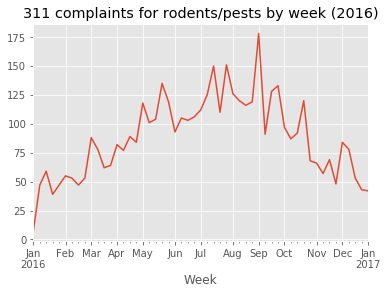

In [40]:
ax = pests2016.resample('W').size().plot(title="311 complaints for rodents/pests by week (2016)")
ax.set_xlabel('Week')